Name : Ameya Ramteke

Roll no : SC22M068

Date : 23rd Sept 2022

## Lab-4 : Satellite Image Analysis

In [1]:
import rasterio as rio
from rasterio import plot
%matplotlib inline

In [2]:
imagepath = c
band2 = rio.open(imagepath+'T43QHD_20220730T051701_B02_10m.jp2',driver='JP2OpenJPEG')#blue band
band3 = rio.open(imagepath+'T43QHD_20220730T051701_B03_10m.jp2',driver='JP2OpenJPEG')#green band
band4 = rio.open(imagepath+'T43QHD_20220730T051701_B04_10m.jp2',driver='JP2OpenJPEG')#red band

Band Count of band 4: 1
Band width of band 4:  10980
Band Height of band 4:  10980


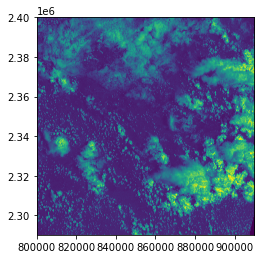

<AxesSubplot:>

In [3]:
print('Band Count of band 4:',band4.count)
print('Band width of band 4: ',band4.width)
print('Band Height of band 4: ',band4.height)
plot.show(band4)

In [4]:
print('band 4 data types: ',band4.dtypes)
print('band 4 projections: ',band4.crs)

band 4 data types:  ('uint16',)
band 4 projections:  EPSG:32643


EPSG: 32643  ===>  UTM Nothern hemisphere 43N

transformation information

In [5]:
band4.transform

Affine(10.0, 0.0, 799980.0,
       0.0, -10.0, 2400000.0)

pixel matrix

In [7]:
band4.read(1)

array([[11360, 11192, 11000, ...,  1911,  1901,  1922],
       [11384, 11216, 10936, ...,  1884,  1904,  1886],
       [11176, 11016, 10904, ...,  1805,  1838,  1814],
       ...,
       [ 1694,  1805,  1972, ...,     0,     0,     0],
       [ 1728,  1772,  1999, ...,     0,     0,     0],
       [ 1737,  1731,  1795, ...,     0,     0,     0]], dtype=uint16)

displaying of different bands

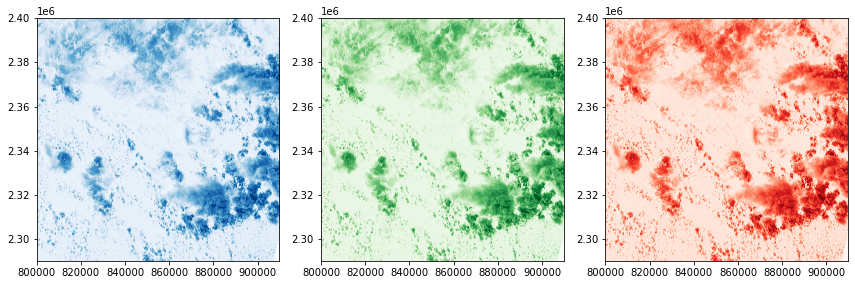

In [6]:
import matplotlib.pyplot as plt
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4))
plot.show(band2, ax=ax1, cmap='Blues')
plot.show(band3, ax=ax2, cmap='Greens')
plot.show(band4, ax=ax3, cmap='Reds')
fig.tight_layout()

True Color Composite

In [12]:
Truecolor = rio.open('E:/College work/Scientific Computing/S2A_MSIL2A_20220730T051701_N0400_R062_T43QHD_20220730T095858.SAFE/output/sentinelTruecolor.tiff','w',driver='Gtiff',
                    width= band2.width, height= band2.height,
                    count=3,
                    crs = band2.crs,
                    transform = band2.transform,
                    dtype = 'uint16'
                    )
Truecolor.write(band2.read(1),3)#blue
Truecolor.write(band3.read(1),2)#green
Truecolor.write(band4.read(1),1)#red
Truecolor.close()

False Color Composite

In [9]:
band8 = rio.open(imagepath+'T43QHD_20220730T051701_B08_10m.jp2',driver='JP2OpenJPEG')#NIR

falsecolor = rio.open('E:/College work/Scientific Computing/S2A_MSIL2A_20220730T051701_N0400_R062_T43QHD_20220730T095858.SAFE/output/sentinelfalsecolor.tiff','w',driver='Gtiff',
                    width= band2.width, height= band2.height,
                    count=3,
                    crs = band2.crs,
                    transform = band2.transform,
                    dtype = 'uint16'
                    )
falsecolor.write(band3.read(1),3)#blue
falsecolor.write(band4.read(1),2)#green
falsecolor.write(band8.read(1),1)#red
falsecolor.close()

Creating NDVI

In [16]:
red = band4.read()
nir = band8.read()

ndvi = (nir.astype(float)-red.astype(float)/(nir+red))

meta = band4.meta
meta.update(driver='GTiff')
meta.update(dtype= rio.float32)

with rio.open('NDVI.tiff','w', **meta) as dst:
    dst.write(ndvi.astype(rio.float32))

C:\Users\ameya\AppData\Local\Temp\ipykernel_20396\3307965605.py:4: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (nir.astype(float)-red.astype(float)/(nir+red))
